In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import datetime

In [22]:
dataset_train= pd.read_csv("Silver Data Last Month.csv")
dataset_train.drop(
    labels=[28 ,29],
    axis = 0,
    inplace=True
)

dataset_train

,Date,Price,Open,High,Low,Vol.,Change %
0,"Sep 27, 2017",16.748,16.700,16.815,16.695,0.04K,-0.33
1,"Sep 26, 2017",16.804,16.875,16.890,16.775,0.11K,-1.49
2,"Sep 25, 2017",17.059,16.850,17.090,16.810,0.17K,0.60
3,"Sep 24, 2017",16.957,17.033,17.033,16.931,0,0.32
4,"Sep 22, 2017",16.903,16.985,16.985,16.905,0.09K,-0.20
5,"Sep 21, 2017",16.937,16.895,16.920,16.800,0.21K,-1.82
6,"Sep 20, 2017",17.251,17.255,17.340,17.010,0.09K,0.33
7,"Sep 19, 2017",17.195,17.135,17.240,17.115,0.16K,0.73
8,"Sep 18, 2017",17.071,17.490,17.520,17.030,0.21K,-3.02
9,"Sep 17, 2017",17.602,17.663,17.663,17.590,0,-0.05


In [23]:
training_set = dataset_train.iloc[:,2:3].values
print(training_set)

print(training_set.shape)

[['16.700']
 ['16.875']
 ['16.850']
 ['17.033']
 ['16.985']
 ['16.895']
 ['17.255']
 ['17.135']
 ['17.490']
 ['17.663']
 ['17.760']
 ['17.650']
 ['17.860']
 ['17.780']
 ['17.890']
 ['17.859']
 ['18.090']
 ['17.840']
 ['17.915']
 ['17.780']
 ['17.929']
 ['17.895']
 ['17.565']
 ['17.420']
 ['17.390']
 ['17.540']
 ['17.055']
 ['17.069']]
(28, 1)


In [24]:
scaler = MinMaxScaler(feature_range =(0,1))
scaled_training_set = scaler.fit_transform(training_set)
print(scaled_training_set)

[[0.        ]
 [0.12589928]
 [0.10791367]
 [0.23956835]
 [0.20503597]
 [0.14028777]
 [0.39928058]
 [0.31294964]
 [0.56834532]
 [0.69280576]
 [0.76258993]
 [0.68345324]
 [0.83453237]
 [0.77697842]
 [0.85611511]
 [0.83381295]
 [1.        ]
 [0.82014388]
 [0.87410072]
 [0.77697842]
 [0.88417266]
 [0.85971223]
 [0.62230216]
 [0.51798561]
 [0.49640288]
 [0.60431655]
 [0.25539568]
 [0.26546763]]


In [26]:
X_train =[]
y_train =[]
for i in range(2,28):
    X_train.append(scaled_training_set[i-2:i,0])
    y_train.append(scaled_training_set[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(26, 2)
(26,)


In [27]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(26, 2, 1)

In [28]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [29]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences=True,input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))


In [30]:
regressor.add(Dense(units=1))
regressor.compile(optimizer = 'adam' ,loss = 'mean_squared_error')
regressor.fit(X_train,y_train,epochs=100,batch_size =32)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.4199
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 0.4125
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 0.4048
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 0.3962
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 0.3879
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 0.3797
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 0.3675
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.3601
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 0.3485
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 0.3406
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 0.3284
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 0.3166
Epoch 13/100
1/1 [==============================] - 0s 

In [31]:
dataset_test = dataset_train

actual_stock_price = dataset_test.iloc[:,2:3].values
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis =0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-2:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(2,30):
    X_test.append(inputs[i-2:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
actual_stock_price

array([['16.700'],
       ['16.875'],
       ['16.850'],
       ['17.033'],
       ['16.985'],
       ['16.895'],
       ['17.255'],
       ['17.135'],
       ['17.490'],
       ['17.663'],
       ['17.760'],
       ['17.650'],
       ['17.860'],
       ['17.780'],
       ['17.890'],
       ['17.859'],
       ['18.090'],
       ['17.840'],
       ['17.915'],
       ['17.780'],
       ['17.929'],
       ['17.895'],
       ['17.565'],
       ['17.420'],
       ['17.390'],
       ['17.540'],
       ['17.055'],
       ['17.069']], dtype=object)

In [32]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
print(float(predicted_stock_price[0]))
print(1)

17.264799118041992
1


In [41]:
time =np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

   
y1=np.zeros([24])
for i in range (0,24):
    y1[i]=float(predicted_stock_price[i])
y2=np.zeros([24])
for i in range (0,24):
    y2[i]=float(actual_stock_price[i])
print(y1)
print(y2)

[17.26479912 17.2341404  17.1187191  17.1766777  17.18427658 17.24783516
 17.22092056 17.22196007 17.35381889 17.34301758 17.52733612 17.62905121
 17.66440201 17.63686371 17.73894501 17.71154976 17.76823235 17.78741455
 17.88166618 17.74882507 17.76993752 17.71756363 17.79624939 17.7252903 ]
[16.7   16.875 16.85  17.033 16.985 16.895 17.255 17.135 17.49  17.663
 17.76  17.65  17.86  17.78  17.89  17.859 18.09  17.84  17.915 17.78
 17.929 17.895 17.565 17.42 ]


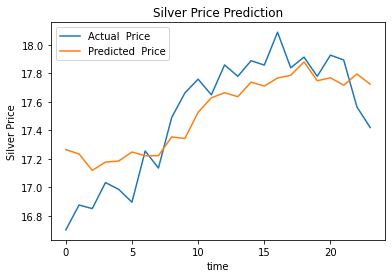

In [45]:
plt.plot(time,y2,label ='Actual  Price')
plt.plot( time,y1,label ='Predicted  Price')
plt.title('Silver Price Prediction')
plt.xlabel('time')
plt.ylabel('Silver Price')
plt.legend(loc="upper left")

plt.show()